In [ ]:
#!pip install librosa #Для установки librosa
import librosa #Для параметризации аудио
import matplotlib.pyplot as plt #Для отрисовки графиков
import librosa.display #Для отображения аудио сигналов
from google.colab import files #Для загрузки файлов
import numpy as np
import pandas as pd
import sklearn

In [ ]:
#загрузка библитек необходимых для работы с нейросетью
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Загружаем осциллограммы


In [ ]:
rasst_micro_17 = pd.read_csv('drive/My Drive/' + 'jpg_csv_rasst_micro_17.csv',index_col=0)

In [ ]:
csv_name_1 = rasst_micro_17.iloc[1] #по центру
csv_name_2 = rasst_micro_17.iloc[11] #слева
csv_name_3 = rasst_micro_17.iloc[31] #справа

csv_name_4 = rasst_micro_17.iloc[61] #по центру 40 см
csv_name_5 = rasst_micro_17.iloc[121] #по центру 60 см

In [ ]:
#частота дискретизации 
#для 2000 отсчетов - 10000 = 0.02
sr = 100000

In [ ]:
micro_1 = pd.read_csv('drive/My Drive/' + 'rasst/{}'.format(csv_name_1[0]))
micro_2 = pd.read_csv('drive/My Drive/' + 'rasst/{}'.format(csv_name_2[0]))
micro_3 = pd.read_csv('drive/My Drive/' + 'rasst/{}'.format(csv_name_3[0]))

micro_4 = pd.read_csv('drive/My Drive/' + 'rasst/{}'.format(csv_name_4[0]))
micro_5 = pd.read_csv('drive/My Drive/' + 'rasst/{}'.format(csv_name_5[0]))

micro_1_1 = micro_1['micro1'].values
micro_2_1 = micro_1['micro2'].values
micro_3_1 = micro_1['micro3'].values
micro_4_1 = micro_1['micro4'].values

micro_1_2 = micro_2['micro1'].values
micro_2_2 = micro_2['micro2'].values
micro_3_2 = micro_2['micro3'].values
micro_4_2 = micro_2['micro4'].values

micro_1_3 = micro_3['micro1'].values
micro_2_3 = micro_3['micro2'].values
micro_3_3 = micro_3['micro3'].values
micro_4_3 = micro_3['micro4'].values

micro_1_4 = micro_4['micro1'].values
micro_2_4 = micro_4['micro2'].values
micro_3_4 = micro_4['micro3'].values
micro_4_4 = micro_4['micro4'].values

micro_1_5 = micro_5['micro1'].values
micro_2_5 = micro_5['micro2'].values
micro_3_5 = micro_5['micro3'].values
micro_4_5 = micro_5['micro4'].values

##Представление трех осциллограмм с помощью plot

In [ ]:
xt = np.arange(2000)

In [ ]:
"""## Нормированные реализации на максимальное по всем каналам"""

x0_1 = micro_1_1
x1_1 = micro_2_1
x2_1 = micro_3_1
x3_1 = micro_4_1

x0_2 = micro_1_2
x1_2 = micro_2_2
x2_2 = micro_3_2
x3_2 = micro_4_2

x0_3 = micro_1_3
x1_3 = micro_2_3
x2_3 = micro_3_3
x3_3 = micro_4_3

x0_4 = micro_1_4
x1_4 = micro_2_4
x2_4 = micro_3_4
x3_4 = micro_4_4

x0_5 = micro_1_5
x1_5 = micro_2_5
x2_5 = micro_3_5
x3_5 = micro_4_5

#Создаём нейронку
model = Sequential()
#Добавляем один активационный слой
model.add(Activation(activation="linear", input_shape=(1,)))
#Компилируем нейронку
model.compile(loss="mse", optimizer="adam")

#Получаем выход сети на этих точках
y0_1 = model.predict(x0_1)
y1_1 = model.predict(x1_1)
y2_1 = model.predict(x2_1)
y3_1 = model.predict(x3_1)

#Получаем выход сети на этих точках
y0_2 = model.predict(x0_2)
y1_2 = model.predict(x1_2)
y2_2 = model.predict(x2_2)
y3_2 = model.predict(x3_2)

#Получаем выход сети на этих точках
y0_3 = model.predict(x0_3)
y1_3 = model.predict(x1_3)
y2_3 = model.predict(x2_3)
y3_3 = model.predict(x3_3)

In [ ]:
#вид сзади
#1-голубой (1 микрофон снизу-справа)
#2-рыжий (8 микрофон сверху-справа)
#3-зеленый (9 микрофон снизу-слева)
#4-голубой (16 микрофон сверху-слева)

Осциллограммы
Предмет по центру


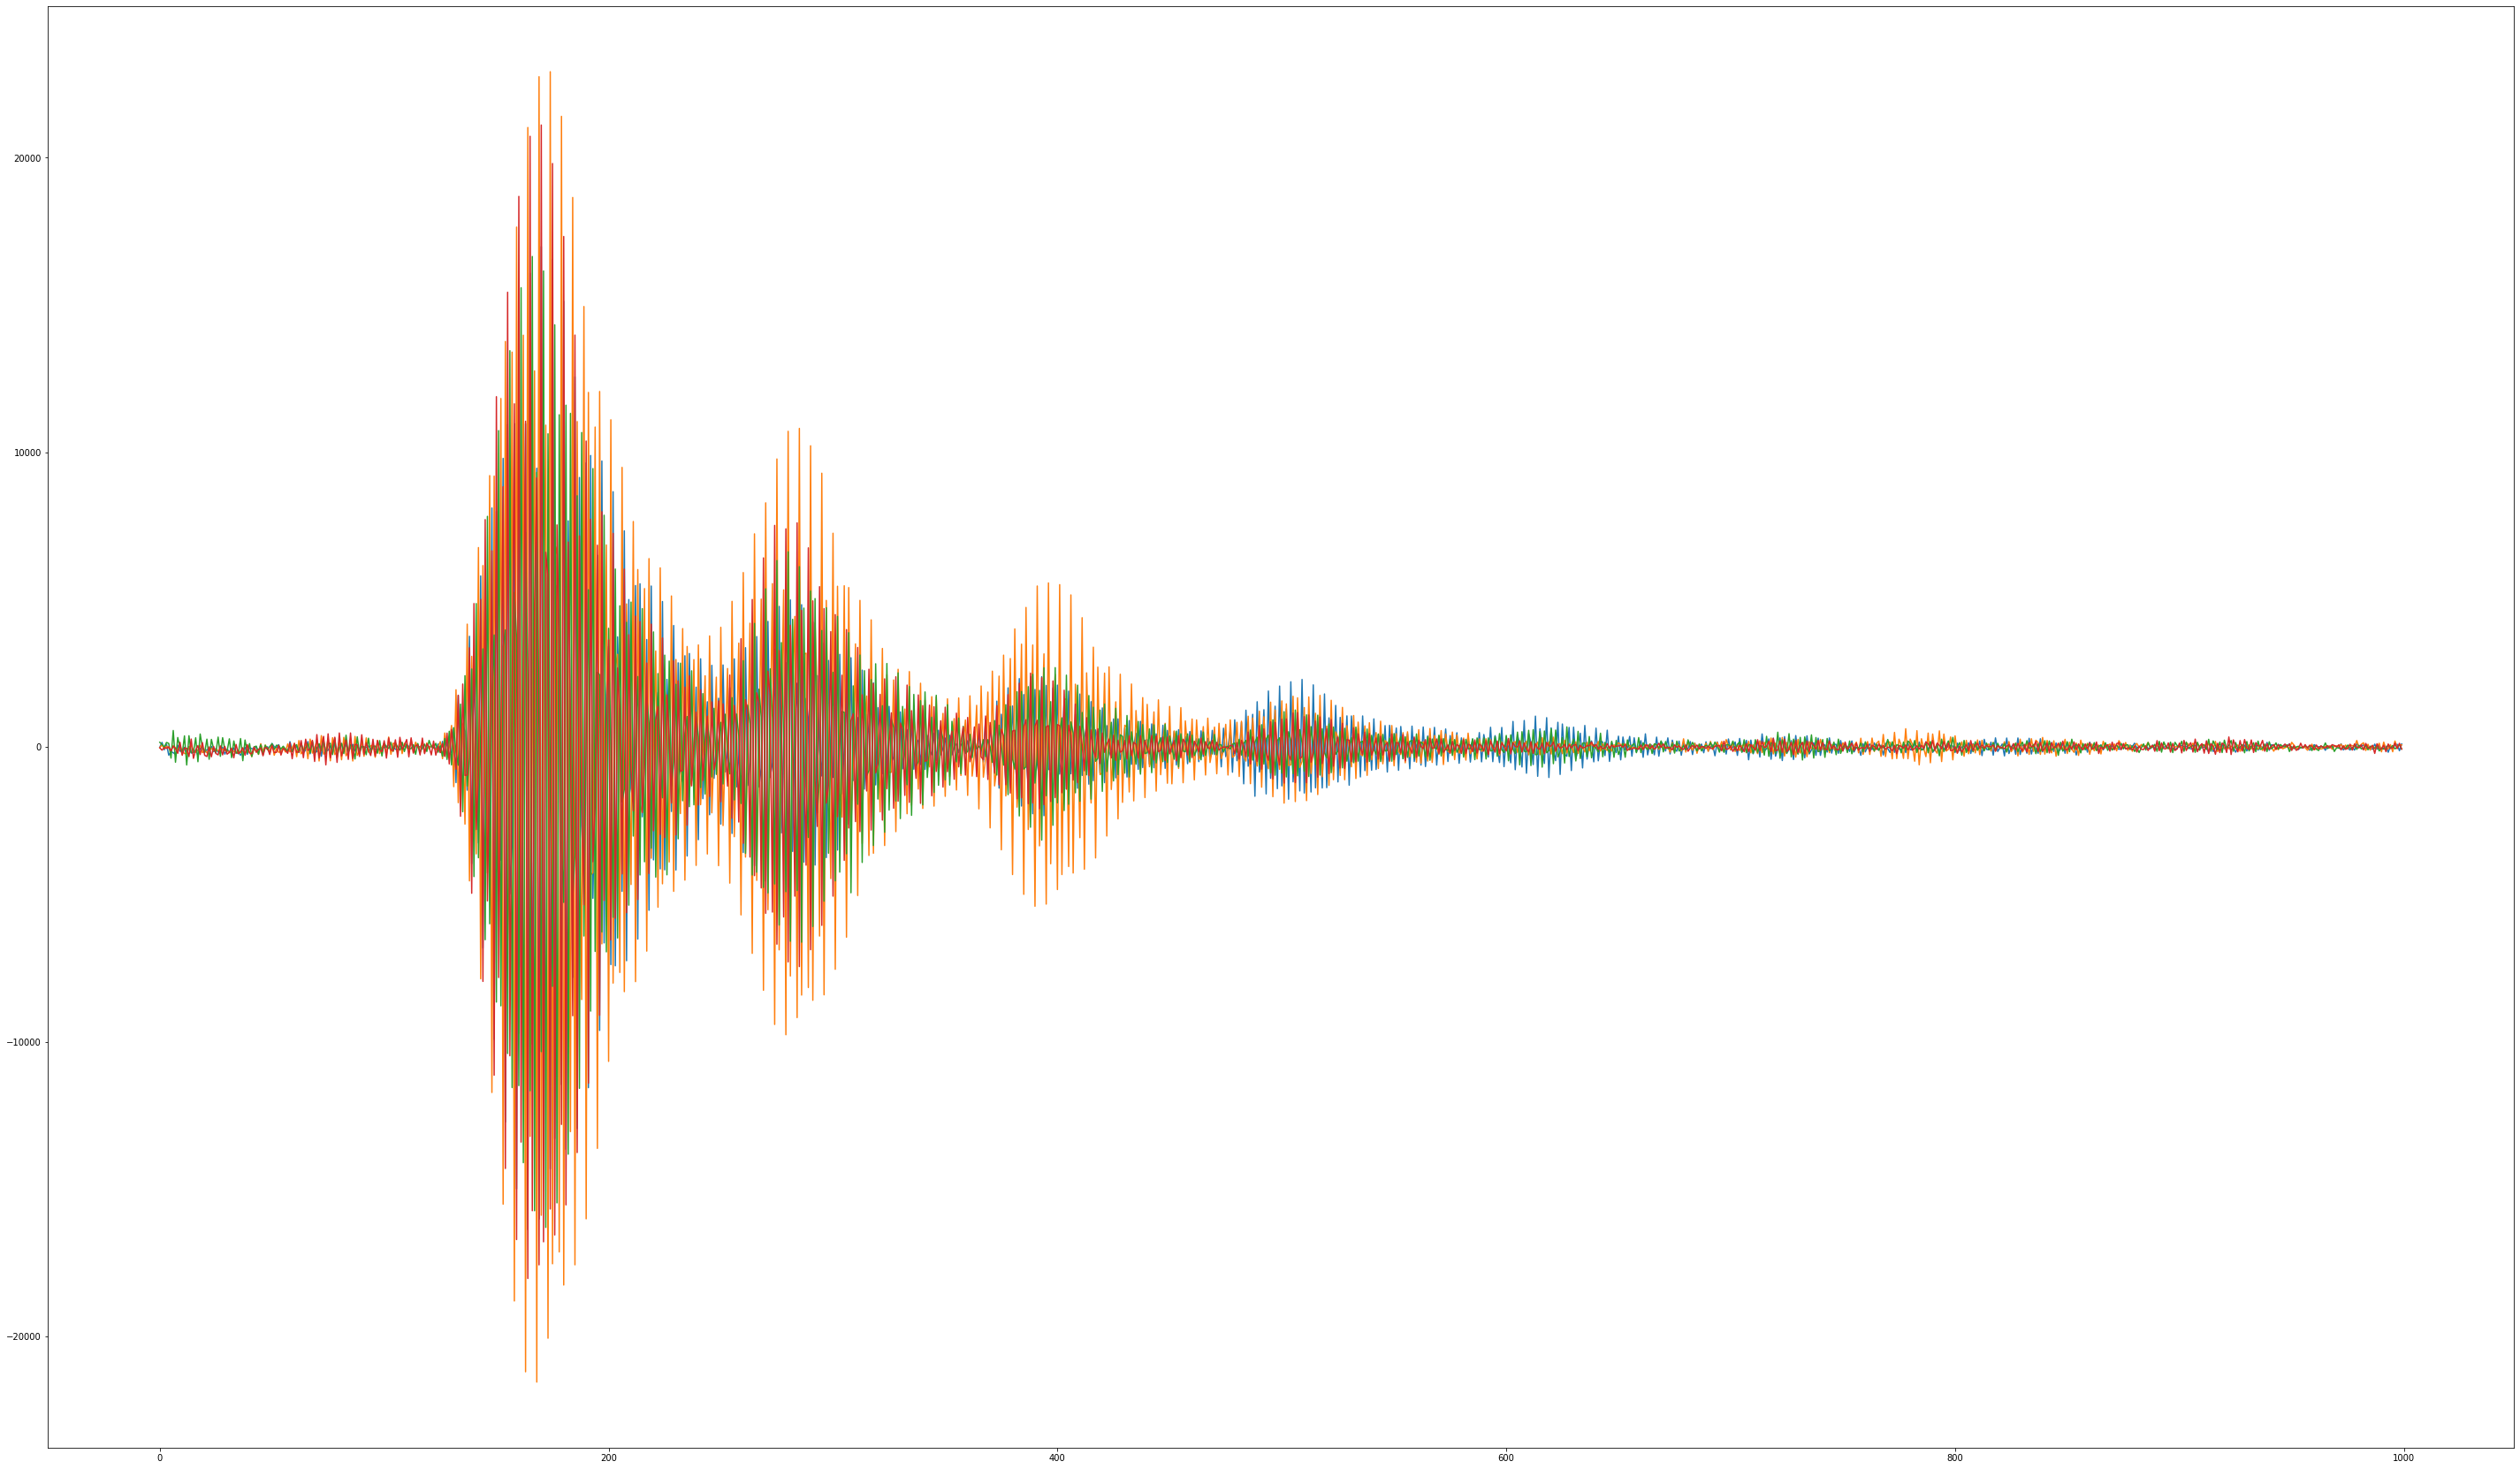

Предмет слева


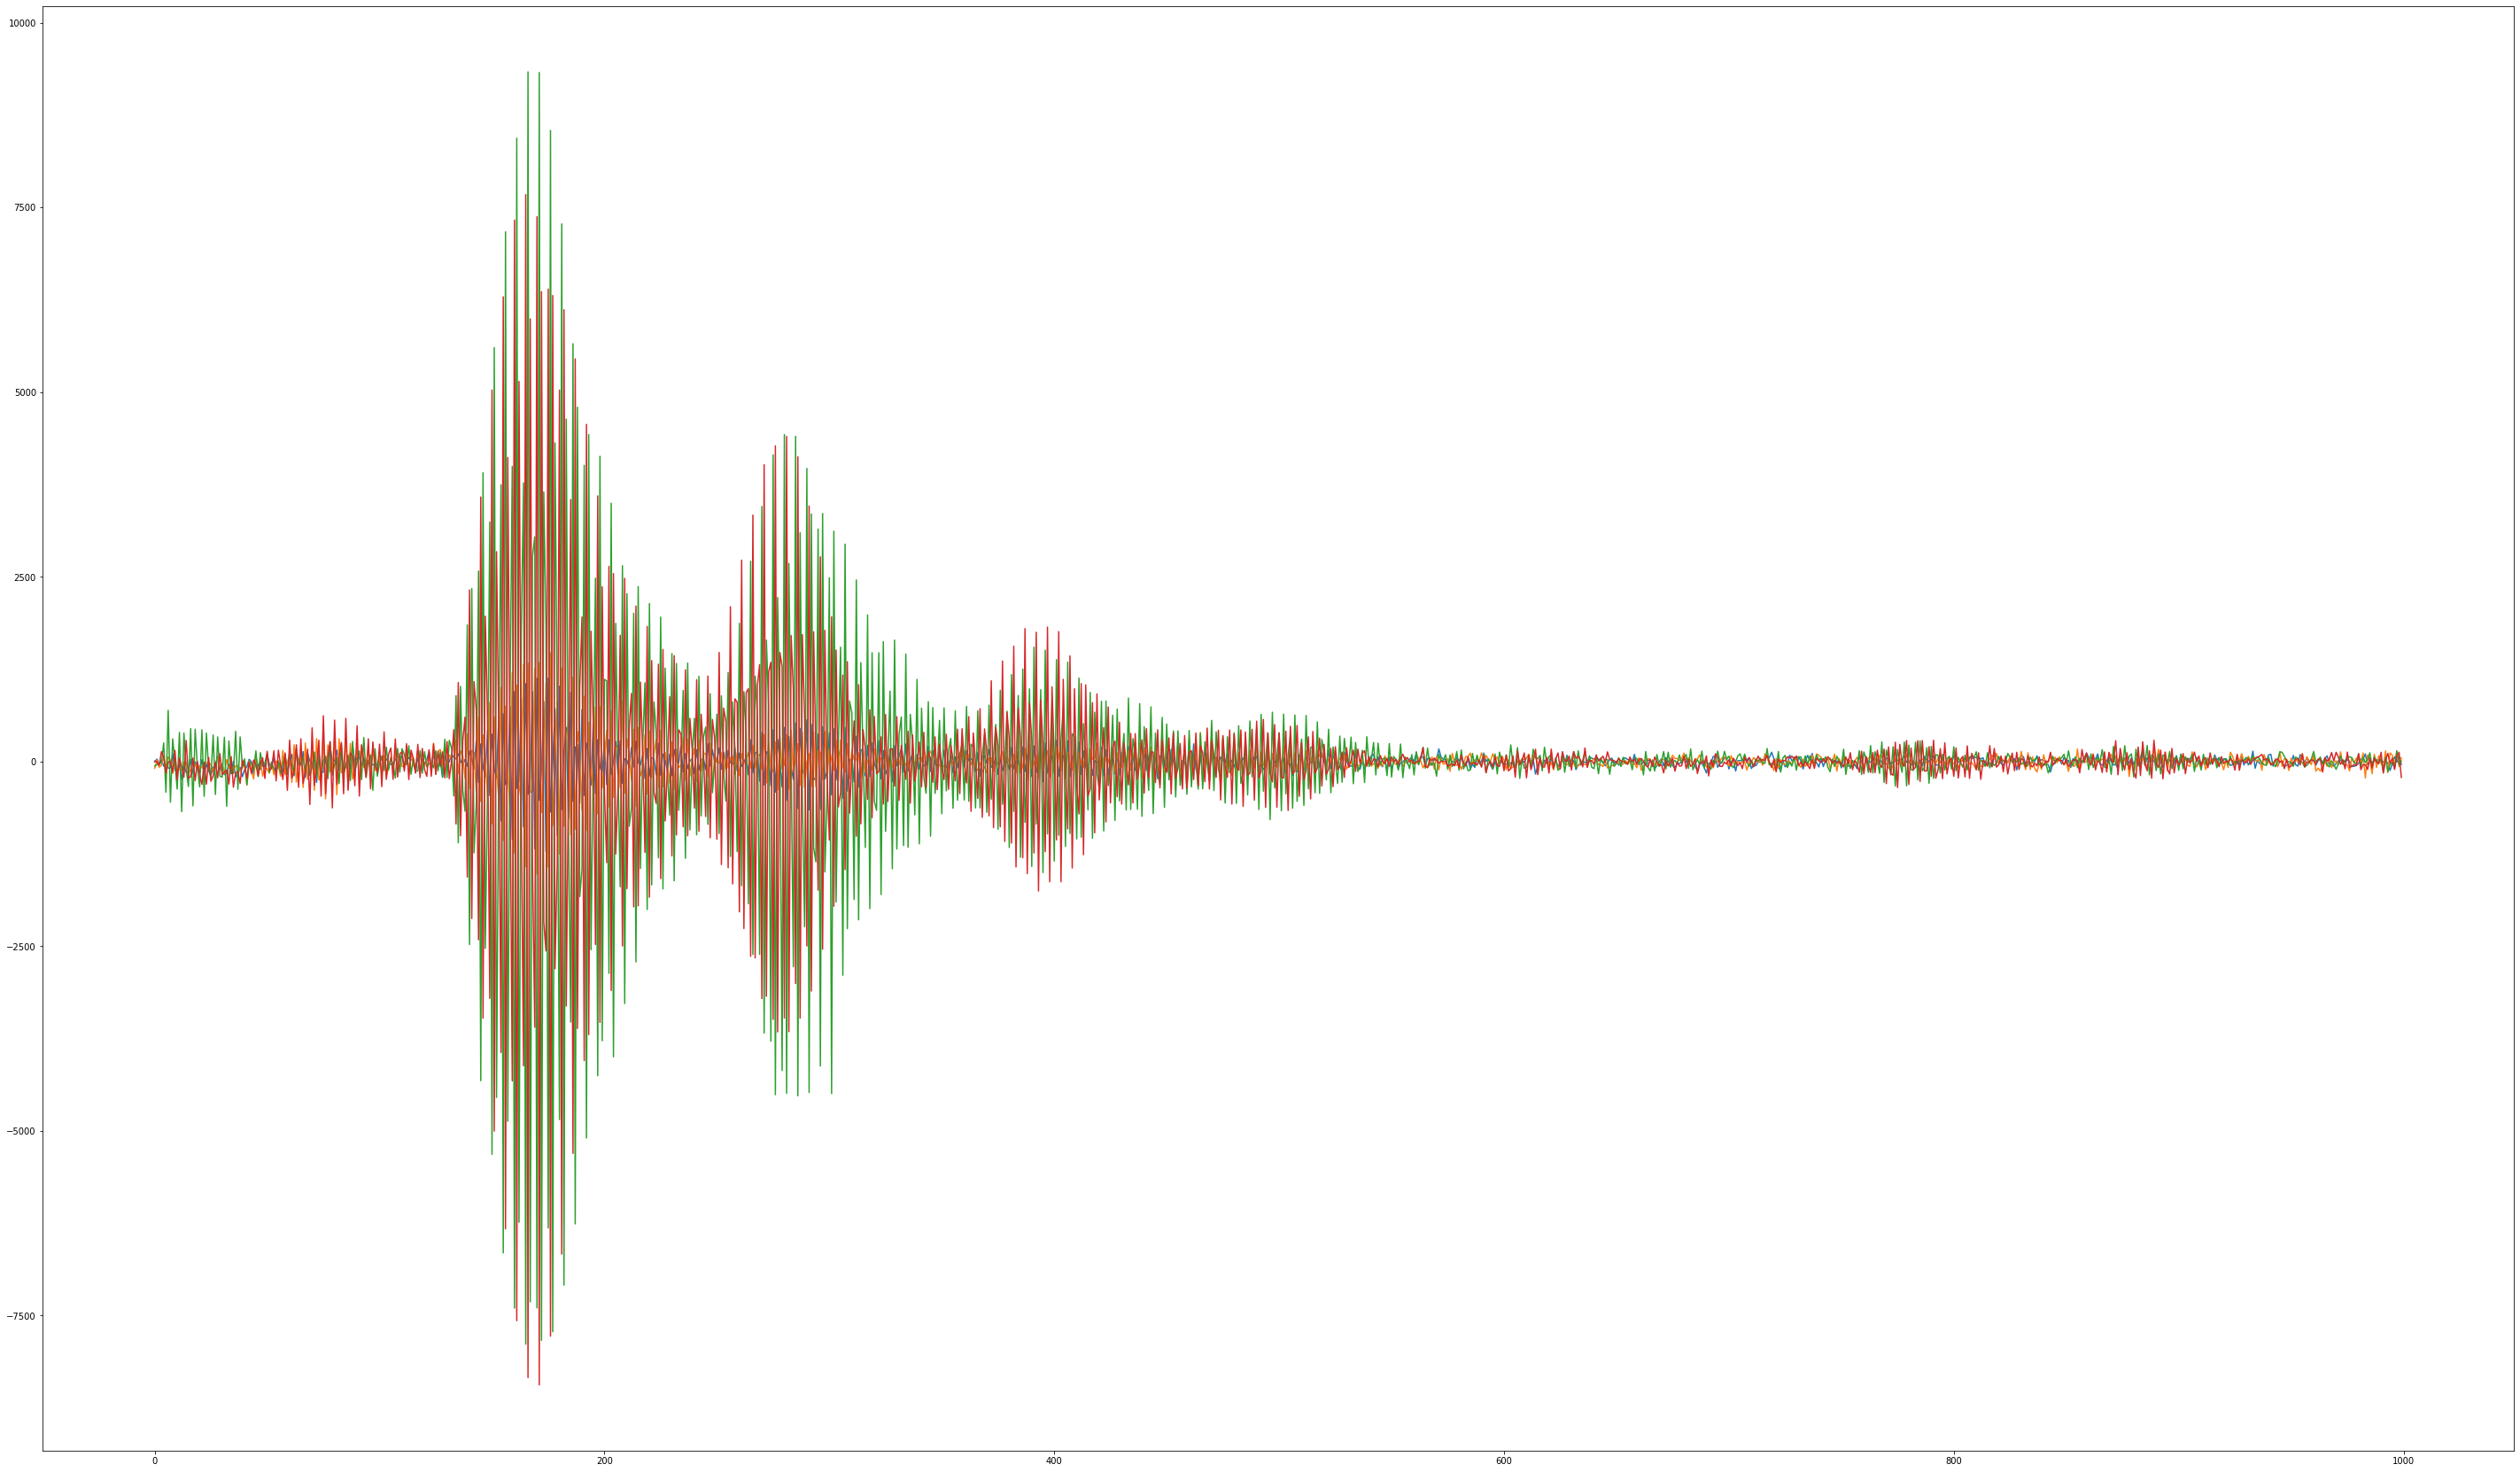

Предмет справа


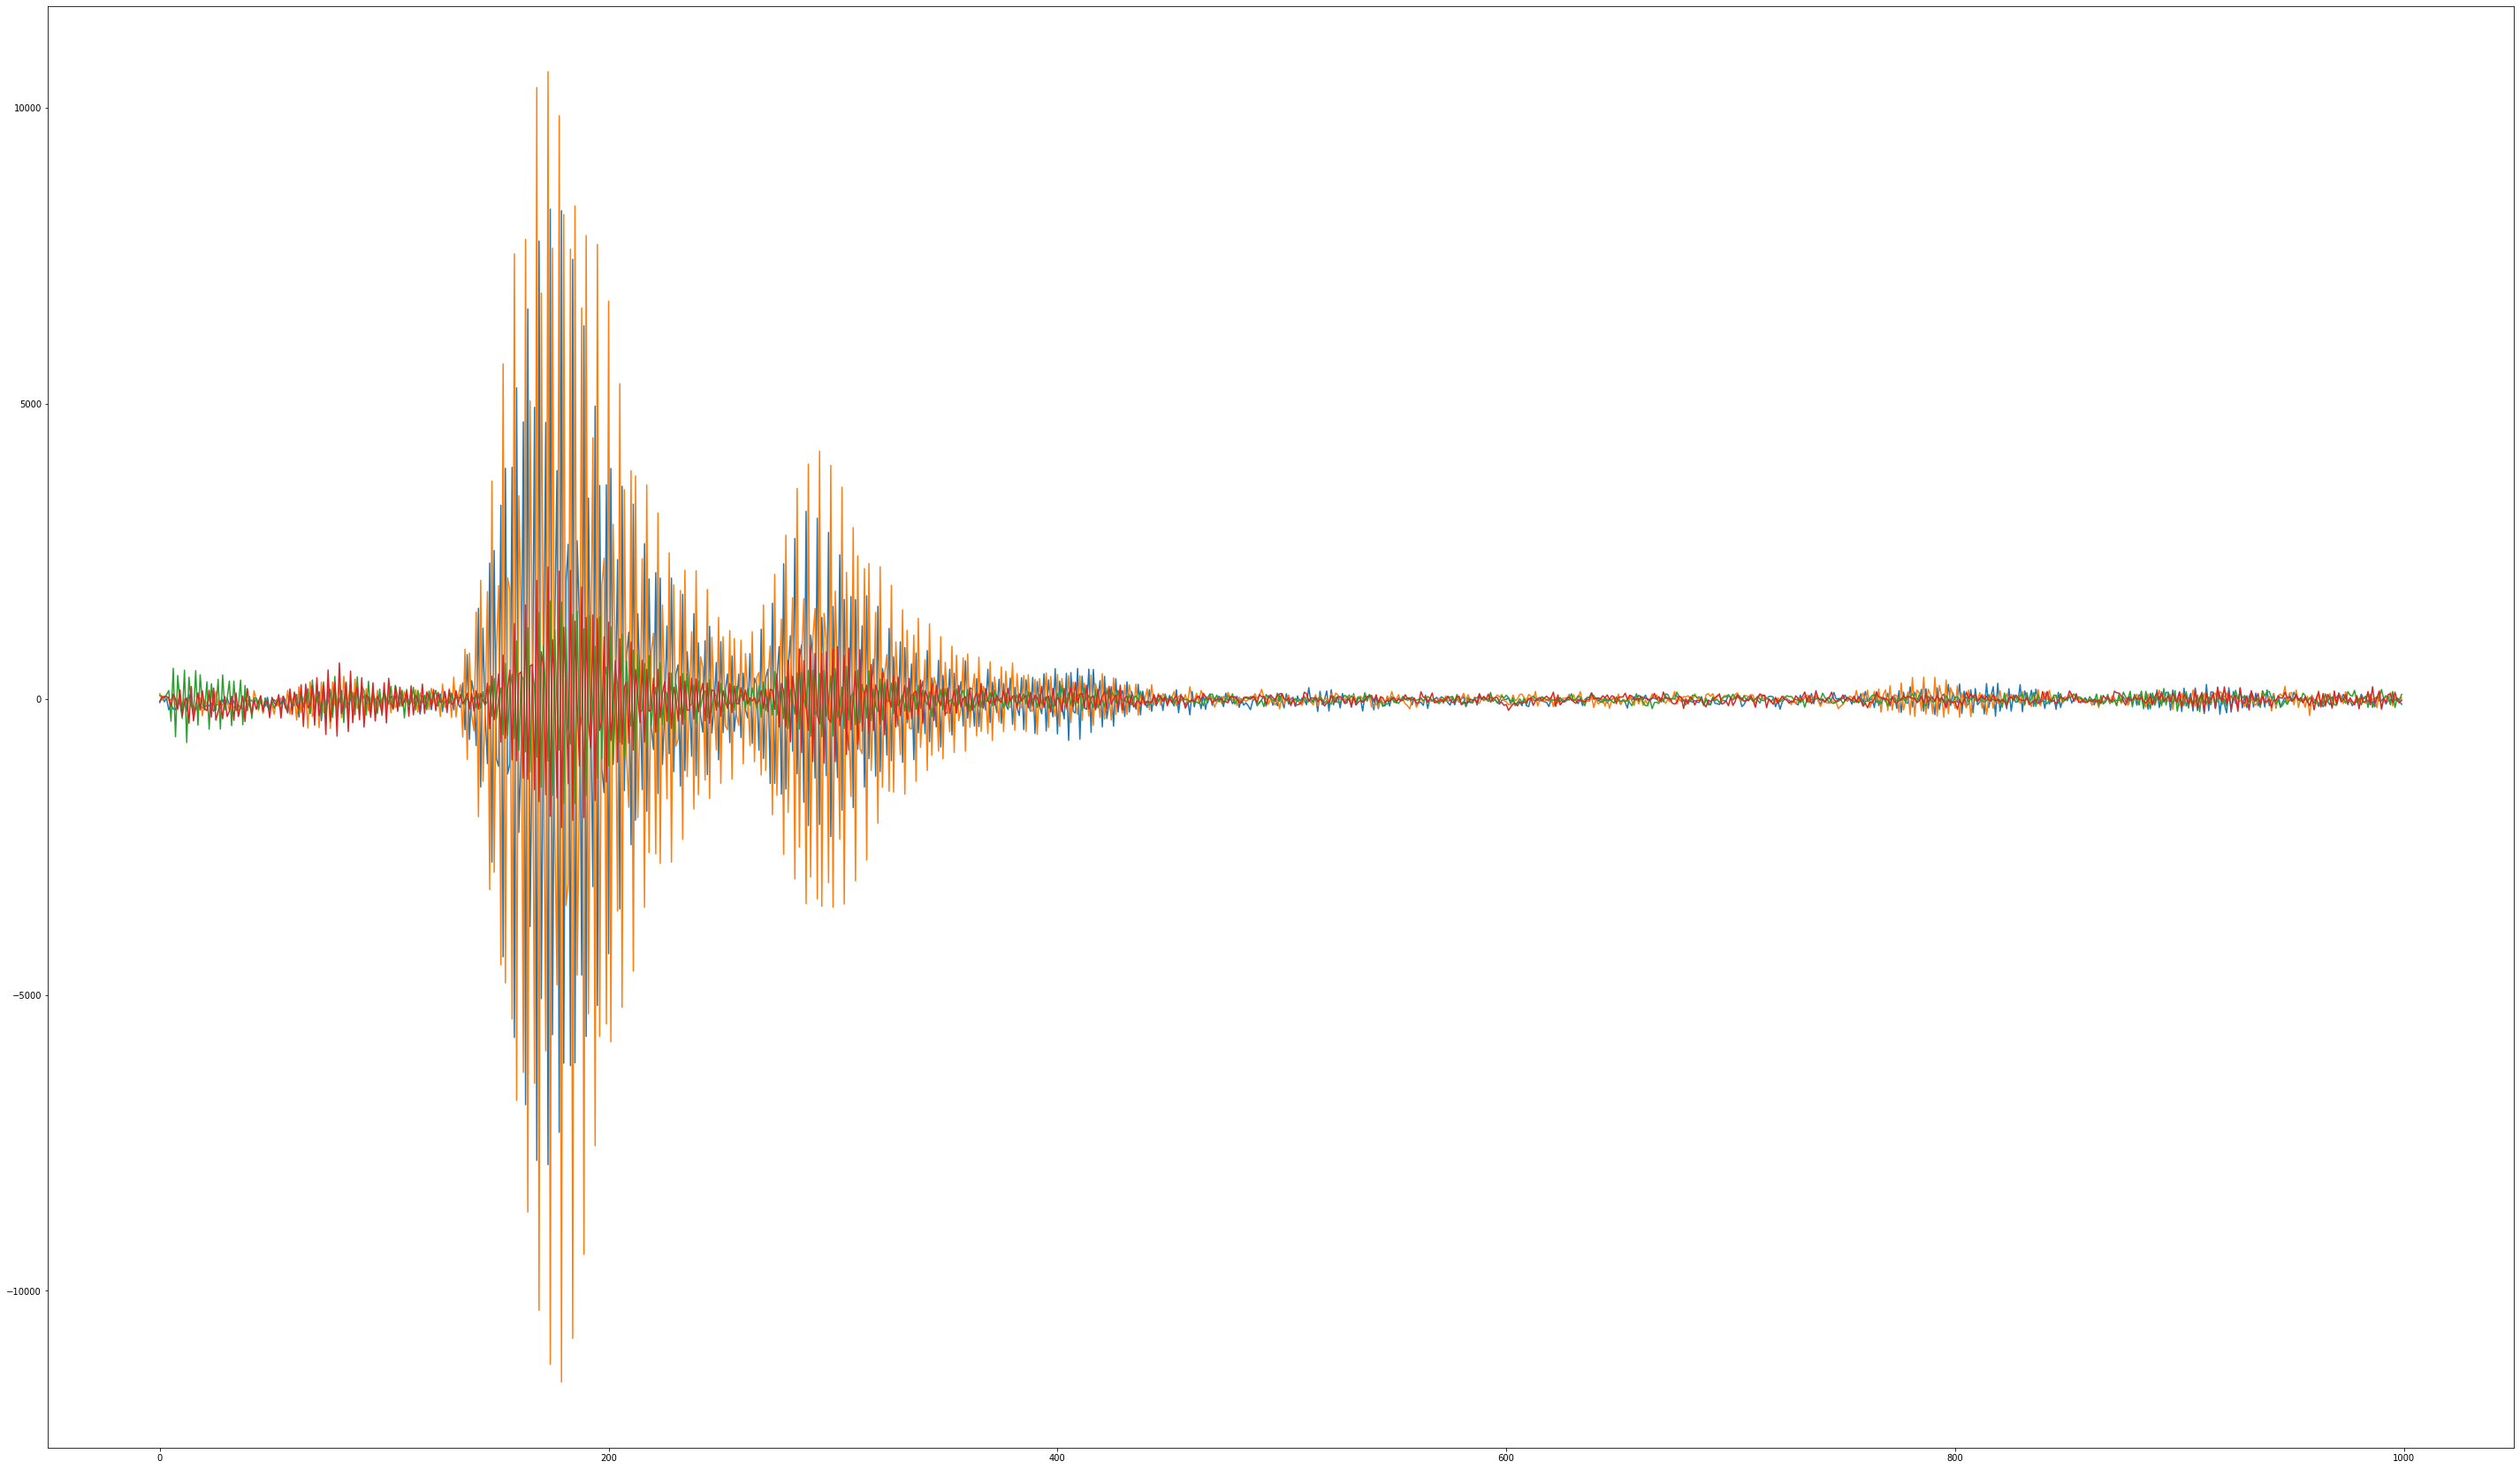

In [ ]:
#Отрисовываем график
print('Осциллограммы')
print('Предмет по центру')
plt.figure(figsize = (50,30))
plt.plot(y0_1[:1000])
plt.plot(y1_1[:1000])
plt.plot(y2_1[:1000])
plt.plot(y3_1[:1000])
plt.show()
print('Предмет слева')
plt.figure(figsize = (50,30))
plt.plot(y0_2[:1000])
plt.plot(y1_2[:1000])
plt.plot(y2_2[:1000])
plt.plot(y3_2[:1000])
plt.show()
print('Предмет справа')
plt.figure(figsize = (50,30))
plt.plot(y0_3[:1000])
plt.plot(y1_3[:1000])
plt.plot(y2_3[:1000])
plt.plot(y3_3[:1000])
plt.show()

Первая осциллограмма - предмет посередине (на 20 см отстоящий от микрофона), осциллограммы с четырех микрофонов явно выделяются

Вторая осциллограмма - предмет расположен слева (на 20 см от микрофона вперед и на 10 см влево - расстояние 22.36 см)
На осциллограммах можно заметить, что выражены осциллограммы зеленого и красного цвета, которые снимаются с 9 и 16 микрофонов, которые как раз расположены справа

Третья осциллограмма - предмет расположен справа (на 20 см от микрофона вперед и на 10 см вправо - расстояние 22.36 см)
На осциллограммах ярко выражены реализации, полученные с 1 и 8 микрофонов, которые расположены справа


##Представление осциллограмм с помощью библиотеки librosa

2000 отсчетов, тогда частота дискретизации для отображения графика 100кГц

чтобы ось времени была от 0 до 0.02с

Осциллограммы
Предмет по центру


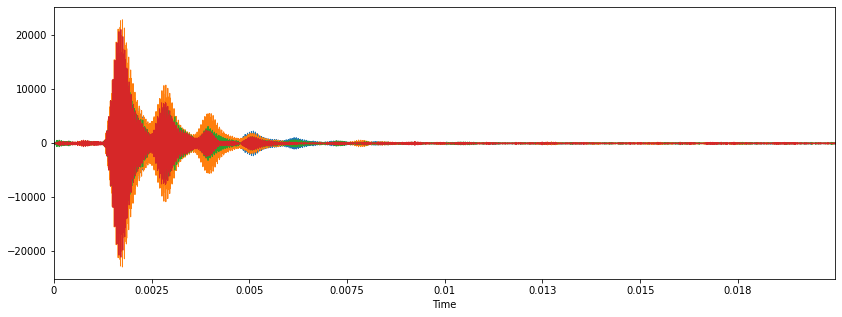

Предмет слева


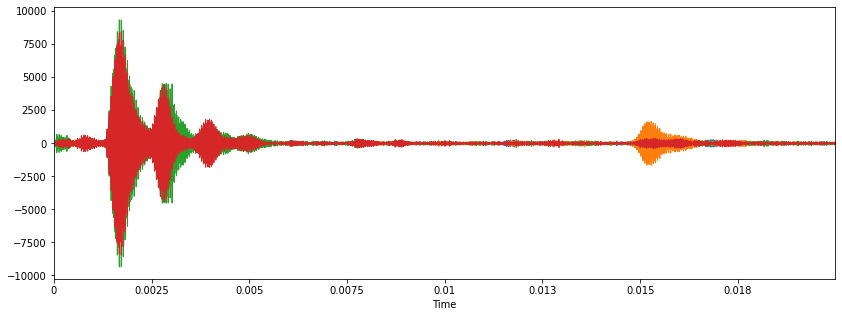

Предмет справа


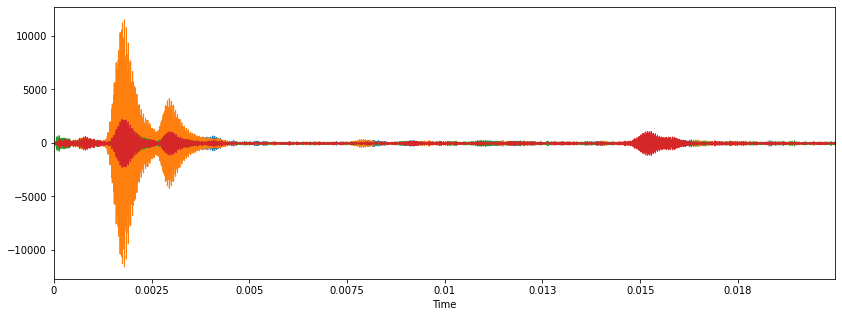

In [ ]:
#Выводим сигнал на экран
print('Осциллограммы')
print('Предмет по центру')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(micro_1_1, sr=sr) #1-голубой
librosa.display.waveplot(micro_2_1, sr=sr) #2-рыжий
librosa.display.waveplot(micro_3_1, sr=sr) #3-зеленый
librosa.display.waveplot(micro_4_1, sr=sr) #4-красный
plt.show()
print('Предмет слева')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(micro_1_2, sr=sr) #1-голубой
librosa.display.waveplot(micro_2_2, sr=sr) #2-рыжий
librosa.display.waveplot(micro_3_2, sr=sr) #3-зеленый
librosa.display.waveplot(micro_4_2, sr=sr) #4-красный
plt.show()
print('Предмет справа')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(micro_1_3, sr=sr) #1-голубой
librosa.display.waveplot(micro_2_3, sr=sr) #2-рыжий
librosa.display.waveplot(micro_3_3, sr=sr) #3-зеленый
librosa.display.waveplot(micro_4_3, sr=sr) #4-красный
plt.show()

In [ ]:
#расстояние до объекта рассчитывается по следующей формуле 
# R = 0.5*(t_max-t_gn)*v в м
# 0.5 - сигнал распространяется до объекта и обратно
# t_max - время, при котором достигается максимальная амплитуда среди четырех микрофонов
# T - длительность одной реализации 0.02 с
# (T-t_gn) - интервал приема
# v скорость звука
v = 340 
T = 0.02

In [ ]:
#длительность импульса генератора
#частота заполнения - 40кГц
#периоды - 15
t_gn = 1/40000*15
print(t_gn)

0.000375


In [ ]:
#объединяем микрофоны
print('Предмет по центру')
M_1 = np.concatenate((x0_1,x1_1,x2_1,x3_1))
#максимальное среди трех значений
M_1_max = max((M_1))
#ищем среди микрофонов положение максимума
t_max_1 = 0
for i in range(8000):
  if M_1[i] == M_1_max:
    print(i)
    if i < 2000:
      print('Первый микрофон - справа снизу')
      t_max_1 = i / 100000
    if i > 2000 and i < 4000:
      print('Второй микрофон - справа верхний')
      t_max_1 = (i-2000) / 100000
    if i > 4000 and i < 6000:
      print('Третий микрофон - слева нижний')
      t_max_1 = (i-4000) / 100000
    if i > 6000 and i < 8000:
      print('Четвертый микрофон - слева верхний')
      t_max_1 = (i-6000) / 100000
print(t_max_1)
R_1 = 0.5*v*(t_max_1 - t_gn)
print(R_1)

Предмет по центру
2174
Второй микрофон - справа верхний
0.00174
0.23204999999999998


In [ ]:
#объединяем микрофоны
print('Предмет слева')
M_2 = np.concatenate((x0_2,x1_2,x2_2,x3_2))
#максимальное среди трех значений
M_2_max = max((M_2))
#ищем среди микрофонов положение максимума
t_max_2 = 0
for i in range(8000):
  if M_2[i] == M_2_max:
    print(i)
    if i < 2000:
      print('Первый микрофон - справа снизу')
      t_max_2 = i / 100000
    if i > 2000 and i < 4000:
      print('Второй микрофон - справа верхний')
      t_max_2 = (i-2000) / 100000
    if i > 4000 and i < 6000:
      print('Третий микрофон - слева нижний')
      t_max_2 = (i-4000) / 100000
    if i > 6000 and i < 8000:
      print('Четвертый микрофон - слева верхний')
      t_max_2 = (i-6000) / 100000
print(t_max_2)
R_2 = 0.5*v*(t_max_2 - t_gn)
print(R_2)

Предмет слева
4166
Третий микрофон - слева нижний
0.00166
0.21845000000000003


In [ ]:
#объединяем микрофоны
print('Предмет справа')
M_3 = np.concatenate((x0_3,x1_3,x2_3,x3_3))
#максимальное среди трех значений
M_3_max = max((M_3))
print(M_3_max)
#ищем среди микрофонов положение максимума
t_max_3 = 0
for i in range(8000):
  if M_3[i] == M_3_max:
    print(i)
    if i < 2000:
      print('Первый микрофон - справа снизу')
      t_max_3 = i / 100000
    if i > 2000 and i < 4000:
      print('Второй микрофон - справа верхний')
      t_max_3 = (i-2000) / 100000
    if i > 4000 and i < 6000:
      print('Третий микрофон - слева нижний')
      t_max_3 = (i-4000) / 100000
    if i > 6000 and i < 8000:
      print('Четвертый микрофон - слева верхний')
      t_max_3 = (i-6000) / 100000
print(t_max_3)
R_3 = 0.5*v*(t_max_3 - t_gn)
print(R_3)

Предмет справа
10613.856417580633
2173
Второй микрофон - справа верхний
0.00173
0.23034999999999997


In [ ]:
#объединяем микрофоны
print('Предмет по центру 40 см')
M_4 = np.concatenate((x0_4,x1_4,x2_4,x3_4))
#максимальное среди трех значений
M_4_max = max((M_4))
#ищем среди микрофонов положение максимума
t_max_4 = 0
for i in range(8000):
  if M_4[i] == M_4_max:
    print(i)
    if i < 2000:
      print('Первый микрофон - справа снизу')
      t_max_4 = i / 100000
    if i > 2000 and i < 4000:
      print('Второй микрофон - справа верхний')
      t_max_4 = (i-2000) / 100000
    if i > 4000 and i < 6000:
      print('Третий микрофон - слева нижний')
      t_max_4 = (i-4000) / 100000
    if i > 6000 and i < 8000:
      print('Четвертый микрофон - слева верхний')
      t_max_4 = (i-6000) / 100000
print(t_max_4)
R_4 = 0.5*v*(t_max_4 - t_gn)
print(R_4)

Предмет по центру 40 см
2281
Второй микрофон - справа верхний
0.00281
0.41395000000000004


In [ ]:
#объединяем микрофоны
print('Предмет по центру 60 см')
M_5 = np.concatenate((x0_5,x1_5,x2_5,x3_5))
#максимальное среди трех значений
M_5_max = max((M_5))
print(M_5_max)
#ищем среди микрофонов положение максимума
t_max_5 = 0
for i in range(8000):
  if M_5[i] == M_5_max:
    print(i)
    if i <= 2000:
      print('Первый микрофон - справа снизу')
      t_max_5 = i / 100000
    if i >= 2000 and i <= 4000:
      print('Второй микрофон - справа верхний')
      t_max_5 = (i-2000) / 100000
    if i >= 4000 and i <= 6000:
      print('Третий микрофон - слева нижний')
      t_max_5 = (i-4000) / 100000
    if i >= 6000 and i <= 8000:
      print('Четвертый микрофон - слева верхний')
      t_max_5 = (i-6000) / 100000
print(t_max_5)
R_5 = 0.5*v*(t_max_5 - t_gn)
print(R_5)

Предмет по центру 60 см
7849.8103997625
2397
Второй микрофон - справа верхний
0.00397
0.61115


##Спектры реализаций

In [ ]:
#Вычисляем спектр сигнала
X_1_1 = librosa.stft(micro_1_1)
X_2_1 = librosa.stft(micro_2_1)
X_3_1 = librosa.stft(micro_3_1)
X_4_1 = librosa.stft(micro_4_1)

X_1_2 = librosa.stft(micro_1_2)
X_2_2 = librosa.stft(micro_2_2)
X_3_2 = librosa.stft(micro_3_2)
X_4_2 = librosa.stft(micro_4_2)

X_1_3 = librosa.stft(micro_1_3)
X_2_3 = librosa.stft(micro_2_3)
X_3_3 = librosa.stft(micro_3_3)
X_4_3 = librosa.stft(micro_4_3)

#Переводим формат спекрта в амплитуду
#И меняем шкалу на децибелы
Xdb_1_1 = librosa.amplitude_to_db(abs(X_1_1))
Xdb_2_1 = librosa.amplitude_to_db(abs(X_2_1))
Xdb_3_1 = librosa.amplitude_to_db(abs(X_3_1))
Xdb_4_1 = librosa.amplitude_to_db(abs(X_4_1))

Xdb_1_2 = librosa.amplitude_to_db(abs(X_1_2))
Xdb_2_2 = librosa.amplitude_to_db(abs(X_2_2))
Xdb_3_2 = librosa.amplitude_to_db(abs(X_3_2))
Xdb_4_2 = librosa.amplitude_to_db(abs(X_4_2))

Xdb_1_3 = librosa.amplitude_to_db(abs(X_1_3))
Xdb_2_3 = librosa.amplitude_to_db(abs(X_2_3))
Xdb_3_3 = librosa.amplitude_to_db(abs(X_3_3))
Xdb_4_3 = librosa.amplitude_to_db(abs(X_4_3))


Спектры с первого микрофона
Предмет по центру - первый микрофон принимает сигнал без шумов


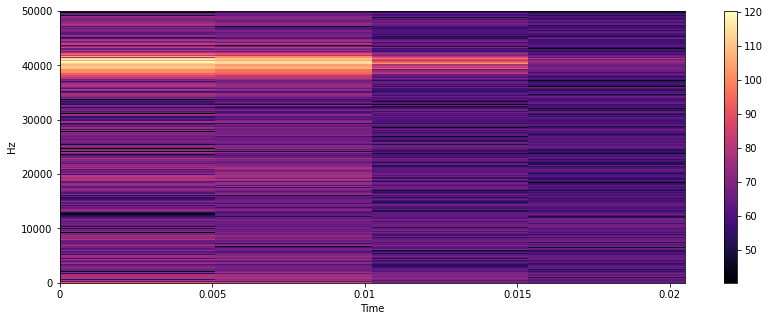

Предмет слева - вне зоны прямой видимости первого микрофона - шумы


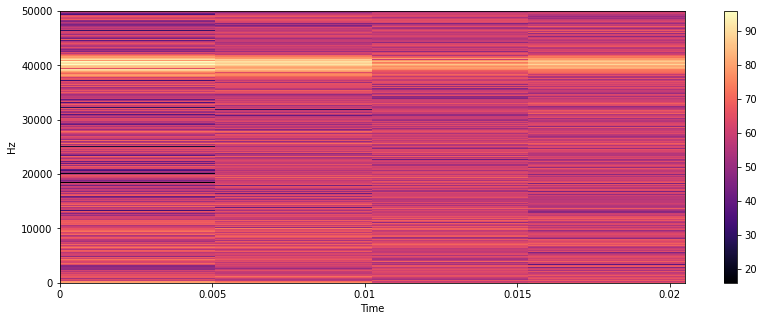

Предмет справа - первый микрофон направлен на предмет


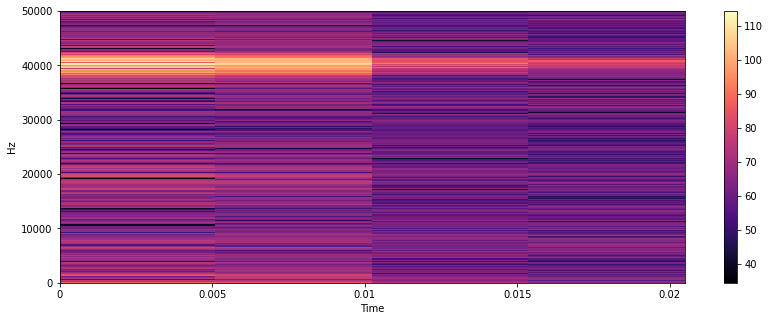

In [ ]:
#Выводим спектрограмму на экран
print('Спектры с первого микрофона')
print('Предмет по центру - первый микрофон принимает сигнал без шумов')
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_1_1, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()
#Выводим спектрограмму на экран
print('Предмет слева - вне зоны прямой видимости первого микрофона - шумы')
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_1_2, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()
#Выводим спектрограмму на экран
print('Предмет справа - первый микрофон направлен на предмет')
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_1_3, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

Спектры с первого микрофона
Предмет по центру - первый микрофон принимает сигнал без шумов


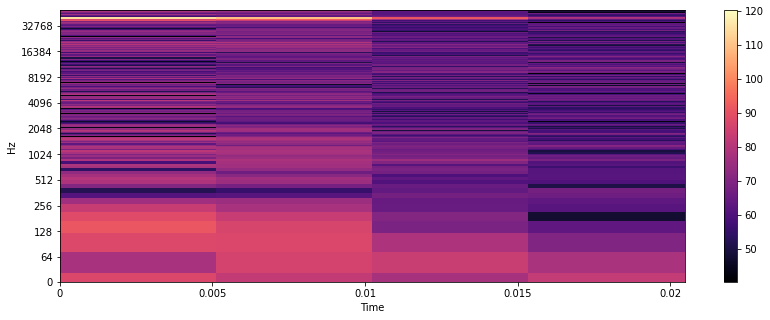

Предмет слева - вне зоны прямой видимости первого микрофона - шумы


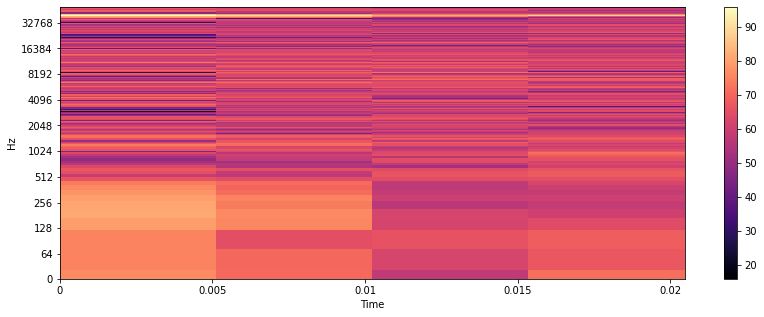

Предмет справа - первый микрофон направлен на предмет


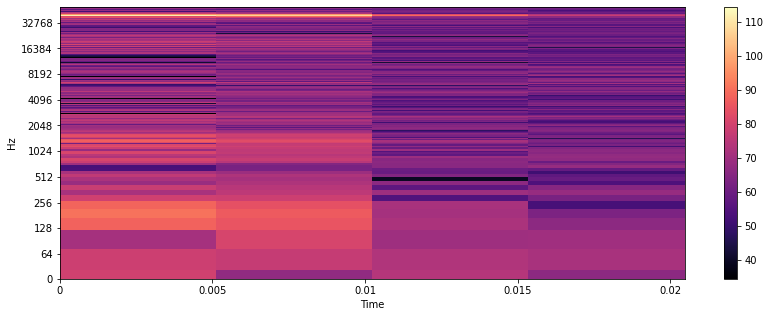

In [ ]:
#Меняем формат оси y на логарифм
print('Спектры с первого микрофона')
print('Предмет по центру - первый микрофон принимает сигнал без шумов')
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_1_1, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()
#Выводим спектрограмму на экран
print('Предмет слева - вне зоны прямой видимости первого микрофона - шумы')
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_1_2, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()
#Выводим спектрограмму на экран
print('Предмет справа - первый микрофон направлен на предмет')
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_1_3, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [ ]:
#Размерность спектра
print(Xdb_1_1.shape)

(1025, 4)


## **Извлечение признаков из аудио сигнала**

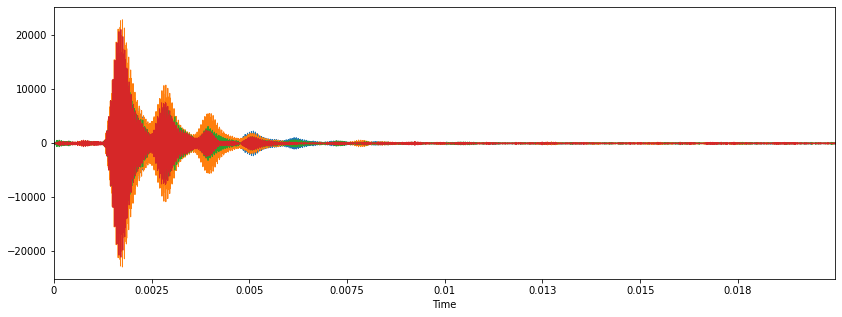

In [ ]:
#Выводим сигнал на экран
plt.figure(figsize=(14, 5))
librosa.display.waveplot(micro_1_1, sr=sr) #1-голубой
librosa.display.waveplot(micro_2_1, sr=sr) #2-рыжий
librosa.display.waveplot(micro_3_1, sr=sr) #3-зеленый
librosa.display.waveplot(micro_4_1, sr=sr) #4-красный
plt.show()

Предмет по центру


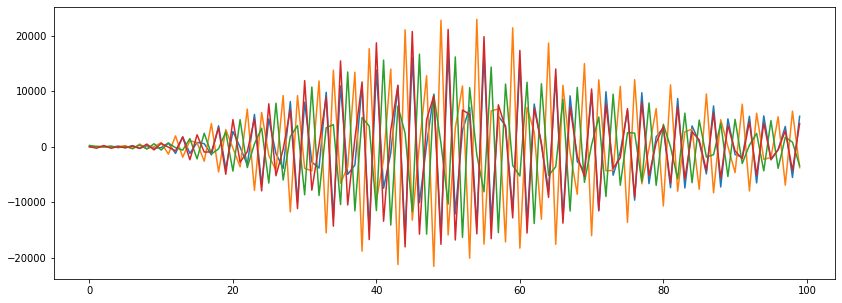

Предмет слева


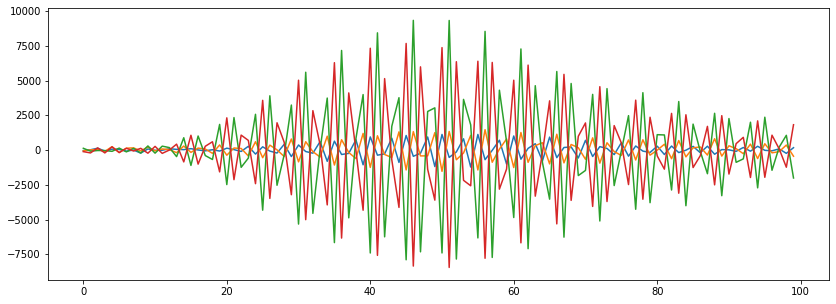

Предмет справа


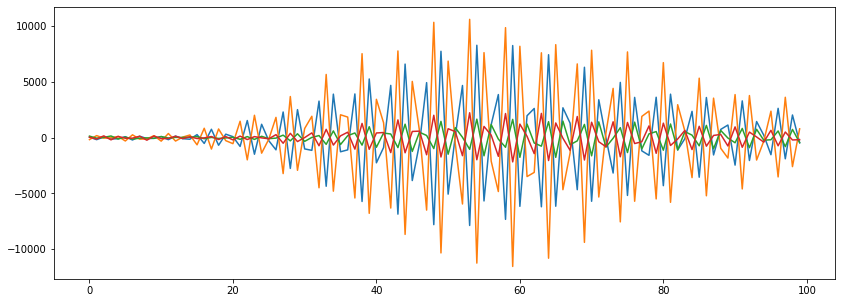

In [ ]:
n0_1 = 120 #Задаём начальную точку отображения
n1_1 = 220 #Задаём конечную точку отображения

#Отобраджаем сигнал
print('Предмет по центру')
plt.figure(figsize=(14, 5))
plt.plot(micro_1_1[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_2_1[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_3_1[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_4_1[n0_1:n1_1]) #От начальной до конечной точки
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')
plt.show()
print('Предмет слева')
plt.figure(figsize=(14, 5))
plt.plot(micro_1_2[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_2_2[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_3_2[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_4_2[n0_1:n1_1]) #От начальной до конечной точки
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')
plt.show()
print('Предмет справа')
plt.figure(figsize=(14, 5))
plt.plot(micro_1_3[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_2_3[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_3_3[n0_1:n1_1]) #От начальной до конечной точки
plt.plot(micro_4_3[n0_1:n1_1]) #От начальной до конечной точки
plt.grid(which='minor',
        color = 'gray',
        linestyle = ':')
plt.show()

###**ПЕРЕСЕЧЕНИЕ НУЛЯ**

In [ ]:
#Рачитываем пересечения нуля
zero_crossings = librosa.zero_crossings(micro_1_1[n0_1:n1_1], pad=False)
#Отображаем результаты
print(sum(zero_crossings)) #Суммарное количество пересечений
print(type(zero_crossings))
print(zero_crossings) #Наличие пересечения в каждо точке

80
<class 'numpy.ndarray'>
[False False False  True  True  True  True  True  True  True False  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True False  True  True  True  True False  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True False  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
 False  True  True  True]


In [ ]:
#Рачитываем пересечения нуля
zero_crossings = librosa.zero_crossings(micro_1_2[n0_1:n1_1], pad=False)
#Отображаем результаты
print(sum(zero_crossings)) #Суммарное количество пересечений
print(type(zero_crossings))
print(zero_crossings) #Наличие пересечения в каждо точке

77
<class 'numpy.ndarray'>
[False  True False  True  True False  True  True  True  True  True False
  True False False False False  True  True  True  True False  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True False  True  True  True  True False  True  True  True  True False
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True]


In [ ]:
#Рачитываем пересечения нуля
zero_crossings = librosa.zero_crossings(micro_1_3[n0_1:n1_1], pad=False)
#Отображаем результаты
print(sum(zero_crossings)) #Суммарное количество пересечений
print(type(zero_crossings))
print(zero_crossings) #Наличие пересечения в каждо точке

81
<class 'numpy.ndarray'>
[False  True  True  True False  True  True  True  True False  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True False  True  True  True  True
 False  True  True  True  True False  True  True  True  True False  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True False  True  True  True  True False  True  True  True  True
  True False  True  True  True  True False  True  True  True  True False
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True]


###**Мел-частотные кепстральные коэффициенты**

(20, 4)
(20, 4)
(20, 4)
(20, 4)


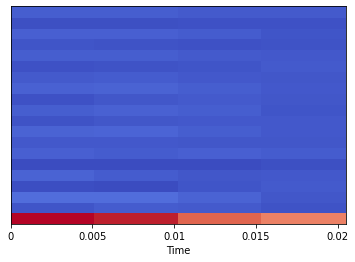

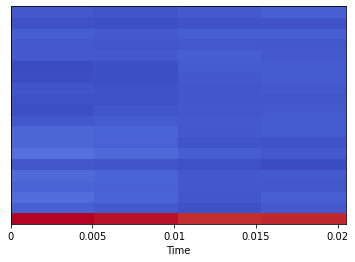

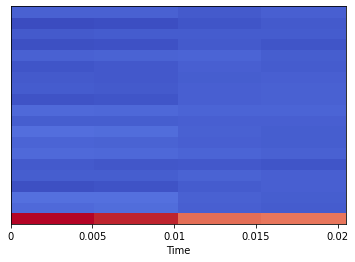

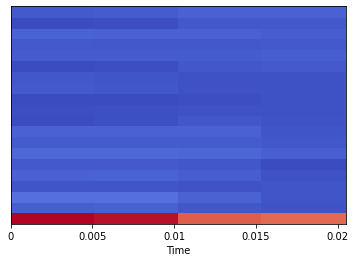

In [ ]:
#Вычисляем и отображаем Мел-частотные кепстральные коэффициенты
mfccs_1 = librosa.feature.mfcc(micro_1_1, sr=sr)
print(mfccs_1.shape) 
mfccs_2 = librosa.feature.mfcc(micro_1_2, sr=sr)
print(mfccs_2.shape) 
mfccs_3 = librosa.feature.mfcc(micro_1_3, sr=sr)
print(mfccs_3.shape) 
mfccs_4 = librosa.feature.mfcc(micro_1_4, sr=sr)
print(mfccs_4.shape) 
librosa.display.specshow(mfccs_1, sr=sr, x_axis='time')
plt.show()
librosa.display.specshow(mfccs_2, sr=sr, x_axis='time')
plt.show()
librosa.display.specshow(mfccs_3, sr=sr, x_axis='time')
plt.show()
librosa.display.specshow(mfccs_4, sr=sr, x_axis='time')
plt.show()

[-5.55111512e-16  1.11022302e-16 -1.66533454e-16  0.00000000e+00
  8.32667268e-17  0.00000000e+00  9.99200722e-16 -3.60822483e-16
  1.11022302e-16  0.00000000e+00  5.55111512e-17  5.55111512e-17
 -2.77555756e-16 -5.55111512e-17  0.00000000e+00 -2.77555756e-16
 -1.38777878e-17 -1.11022302e-16 -1.66533454e-16  1.66533454e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


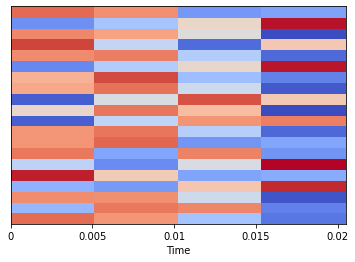

In [ ]:
#Нормируем Мел коэффициенты
mfccs_1 = sklearn.preprocessing.scale(mfccs_1, axis=1)
#Выводим среднее значение
print(mfccs_1.mean(axis=1))
#Выводим среднеквадратичное отклонение
print(mfccs_1.var(axis=1))
#Отображаем нормированные коэффициенты
librosa.display.specshow(mfccs_1, sr=sr, x_axis='time')
plt.show()

[ 0.00000000e+00  3.46944695e-17 -4.16333634e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.66533454e-16  5.55111512e-17
  1.11022302e-16 -5.55111512e-17  5.55111512e-17 -2.22044605e-16
  0.00000000e+00  5.55111512e-17  0.00000000e+00  5.55111512e-17
  8.32667268e-17 -4.16333634e-17 -1.11022302e-16  5.55111512e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


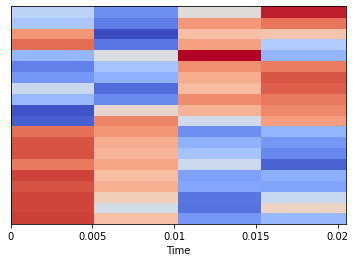

In [ ]:
#Нормируем Мел коэффициенты
mfccs_2 = sklearn.preprocessing.scale(mfccs_2, axis=1)
#Выводим среднее значение
print(mfccs_2.mean(axis=1))
#Выводим среднеквадратичное отклонение
print(mfccs_2.var(axis=1))
#Отображаем нормированные коэффициенты
librosa.display.specshow(mfccs_2, sr=sr, x_axis='time')
plt.show()

###**Частота цветности**

(12, 21)


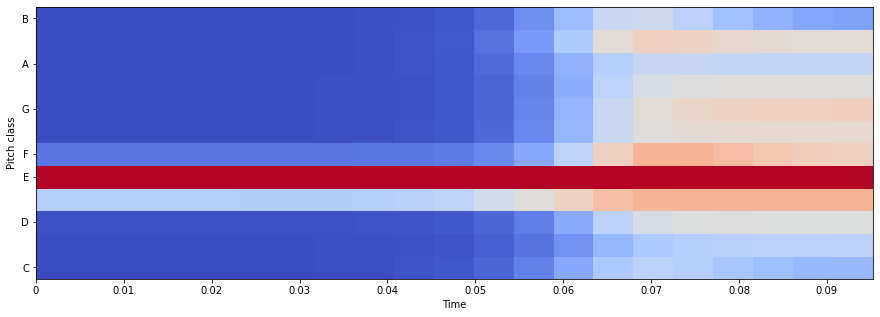

In [ ]:
hop_length = 100 #Задаём размер отрезка сигнала, по которому расчитывается частоты цветности
#Расчитываем и отображаем частоту цветности
chromagram_1 = librosa.feature.chroma_stft(micro_1_1, sr=sr, hop_length=hop_length)
print(chromagram_1.shape)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram_1, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.show()

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


(12, 21)


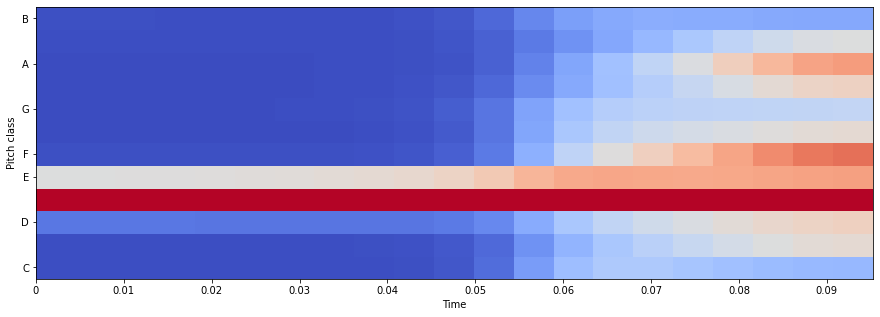

In [ ]:
hop_length = 100 #Задаём размер отрезка сигнала, по которому расчитывается частоты цветности
#Расчитываем и отображаем частоту цветности
chromagram_4 = librosa.feature.chroma_stft(micro_1_4, sr=sr, hop_length=hop_length)
print(chromagram_4.shape)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram_4, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.show()